# <span style="color:#3498db">**Univariate TFR statistics, a mini-tutorial**</span>


Specifically, to assess the statistical significance of spectral estimates obtained from electrophysiological data (in this case LFP) we used non-parametric permutation tests and focused on the multiple comparison correction of time frequency representations (TFRs). We show that the success of the two approaches depends on the dimensions of the data at hand, be these spatial locations, time and frequency analysis parameters, trials of different conditions, the nature of hypothesis, etc. For basic pedagogical purposes, here I focus on spectral power increases relative to baseline using two variants of essentially the same approach: 1) null hypothesis testing using the min-max distribution approach, which captures variations at the extremes of the null distribution, and 2) null hypothesis testing using the whole null distribution, obtained by averaging across specific dimensions.

Since there are several ways to achieve these goals and many realizations of these and other related methods (i.e. thresholds may be obtained from the percentiles of the null distribution directly and further corrected in equivalent ways, or the pooling of data accomplished among specific dimensions), here I focus on these two common methods using very simple examples in the hope to help those researchers (including myself) that are or may be in need of clarity on these matters, touch ground. Depending on the approach, the computation of the p-values will change slightly. In the min-max approach the minimum and maximum values at each permutations are used. When testing using the whole null distribution, the null values obtained from the permutations are averaged the same way the empirical distribution is averaged so the dimensions of the empirical distributions are preserved in the null distribution. Once the null distributions have been obtained, p-values are obtained using the empirical cumulative distribution. Provided the right Python environment, this Jupyter notebook should work as a simple mini-tutorial and support the discussion of these and related basic approaches for computing TFRs and assessing their statistical significance in a clear way. The methods presented here are a work in progress. I plan to make some refinements in the next few weeks. Should you be interested in  employing these methods or if you have any questions, please feel free to reach out to me. I would be more than happy to assist you further.

The package can be downloaded from here: https://github.com/nicogravel/tfrStats

Then we need to load the module with the functions we want to use and define the paths. 

## Installation


To run the [notebook](https://github.com/nicogravel/tfrStats/blob/main/docs/html/notebooks/univariate_tfr_stats.ipynb), clone the package (or your fork) locally and then:
  
    
```
# Create Conda environment

git clone https://github.com/nicogravel/tfrStats.git

cd tfrStats

conda env create -f environment.yml

# Install the tfrStats package

pip install -e .

```
  

Voilà!

In [1]:
from tfrStats.plot_tfr_stats import plot_tfr_stats as plot_tfr_stats
from tfrStats.plot_dtfr_stats import plot_dtfr_stats as plot_dtfr_stats

#in_path   = '/Volumes/.../data/'
#out_path  = '/Volumes/.../results/stats/univariate/'
in_path   = '/Volumes/Gandalf/MWlamprop/data/'
out_path  = '/Volumes/Gandalf/MWlamprop/results/stats/univariate/'
paths     = [in_path,out_path]

##  Uncomment this to run the notebook locally (and see the example results)
#example_data = '/Users/nicogravel/Documents/Websites/tfrStats/tfrStats_local/docs/source/notebooks/example_data/'
#paths     = [in_path,example_data]


## Compute the null distributions 

I have pre-computed a couple of null distributions for the examles in the notebook.If you wish to compute the null distributions yourself, you can run the following (provided you are in posession of suitable data ; ) ... For detailed contro, please do not hesitate in scrutinizing and editing the functions within the package. For now, the example is based on obtaining a the null distribution of % signal change from baseline by flipping a baseline period with a period that has the same length unfolding within the task.


In [2]:
from tfrStats.tfr_spw_stats_whole import tfr_spw_stats_whole as tfr_spw_stats_whole
from tfrStats.tfr_spw_stats_minmax import tfr_spw_stats_minmax as tfr_spw_stats_minmax

n_perm = 2 # just to see if it works :P
fband  = 1
cond   = 0
#tfr_emp, tfr_null = tfr_spw_stats_whole(paths,cond,0,fband,n_perm)
#tfr_emp, tfr_null = tfr_spw_stats_minmax(paths,cond,0,fband,n_perm)

## Statistical thresholds overlaid onto spatio-temporal frequency maps

Here we plot TFRs with the significance threshold computed from p-values (i.e. p-val <= 0.05) (top panel, blue trace). The alpha mask specifies the section containing the values above the null percentile cutoff (i.e. 95%). The p-values (bottom panel) with the null percentile cutoff  (red trace). We do so for spectral power as a function of frequency, space and time. For spatial TFR one must consider the pooling of data over predefined frequency bins, as well as spatial dimentions (i.e.  ROIs). Therefore, the multiple correction will change slightly. 

*  Results saving minimal and maximal values at each permutation iteration (Min-Max approach)

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 19, 57)
tfr null    (1000, 30, 12, 19, 2)
min-max
cutoff computed using min/max of null distribution:  73.47789559347052
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_low_grat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 19, 57)
tfr null    (1000, 30, 12, 19, 2)
peak frequency range :  16.0
power average within peak: 59.503313756810016
min-max
cutoff computed using min/max of null distribution:  74.00481171890463
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_low_grat_spw.png


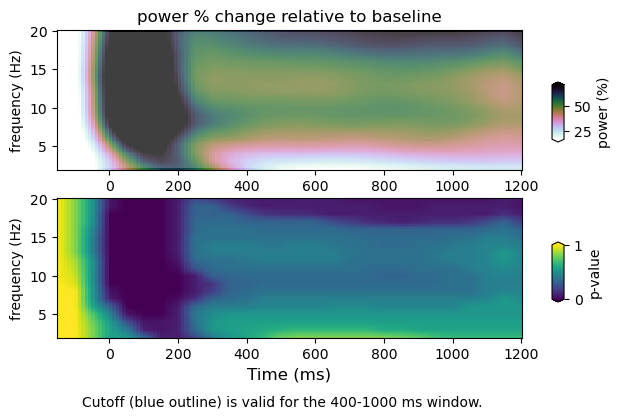

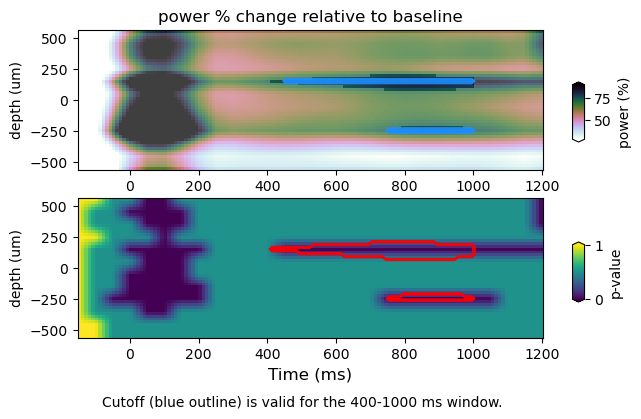

In [3]:
type         = 'minmax'
null         = [95, 0.05] # percentile, p-value
fband        = 0
cond         = 0

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (1000, 30, 12, 16, 2)
min-max
cutoff computed using min/max of null distribution:  75.96054268486813
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_high_grat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (1000, 30, 12, 16, 2)
peak frequency range :  28.0 44.0
power average within peak: 86.6390137791448
min-max
cutoff computed using min/max of null distribution:  70.91082666125475
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_high_grat_spw.png


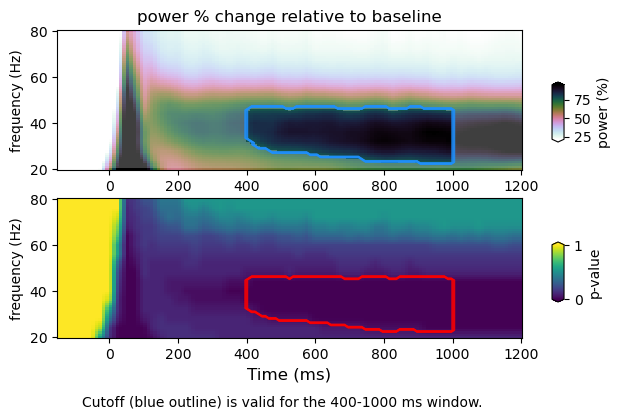

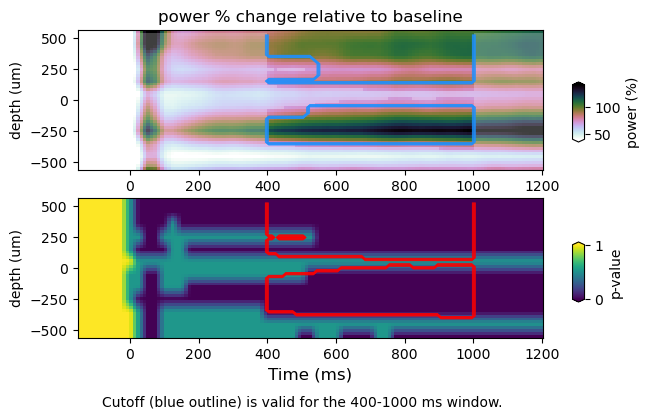

In [4]:
type         = 'minmax'
null         = [95, 0.05] # percentile, p-value
fband        = 1 
cond         = 0

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 11, 141)
tfr null    (1000, 30, 12, 11, 2)
min-max
cutoff computed using min/max of null distribution:  26.259756367656944
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_higher_grat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_grat_spw_1000_minmax.npz
tfr emp  :  (30, 12, 11, 141)
tfr null    (1000, 30, 12, 11, 2)
peak frequency range :  128.0
power average within peak: 17.280991024867717
min-max
cutoff computed using min/max of null distribution:  26.517278996687608
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_higher_grat_spw.png


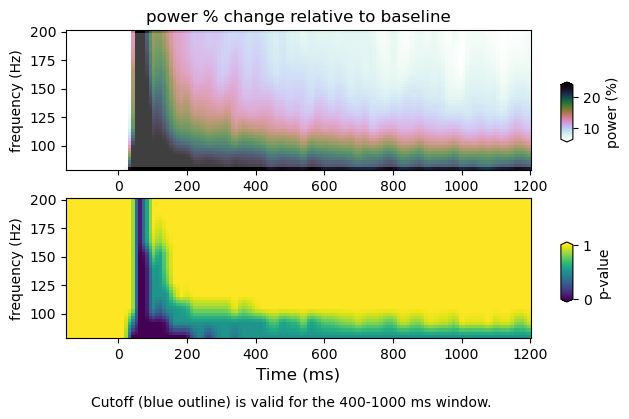

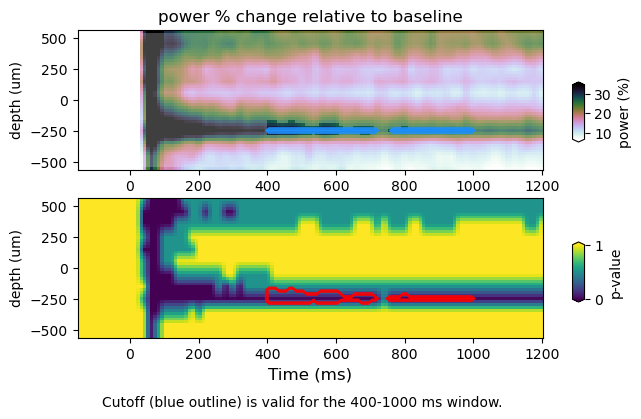

In [5]:
type         = 'minmax'
null         = [95, 0.05] # percentile, p-value
fband        = 2
cond         = 0

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 

* Results using the whole null distribution averaged across relevant dimensions

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_grat_spw_100.npz
tfr emp  :  (30, 12, 19, 57)
tfr null    (30, 12, 19, 57)
whole-null
cutoff computed using whole null distribution:  71.51287578360686
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_low_grat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_grat_spw_100.npz
tfr emp  :  (30, 12, 19, 57)
tfr null    (30, 12, 19, 57)
peak frequency range :  16.0
power average within peak: 59.503313756810016
whole-null
cutoff computed using whole null distribution:  82.76163923804182
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_low_grat_spw.png


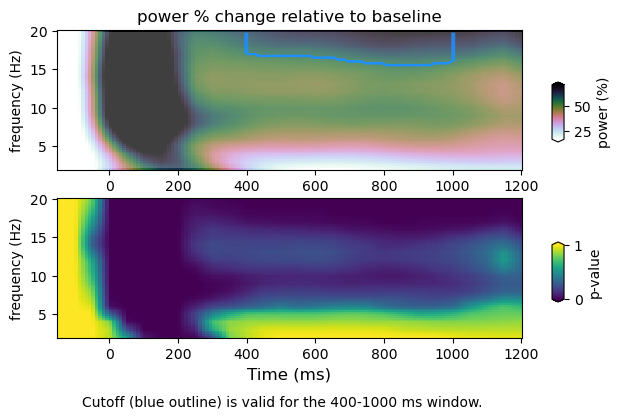

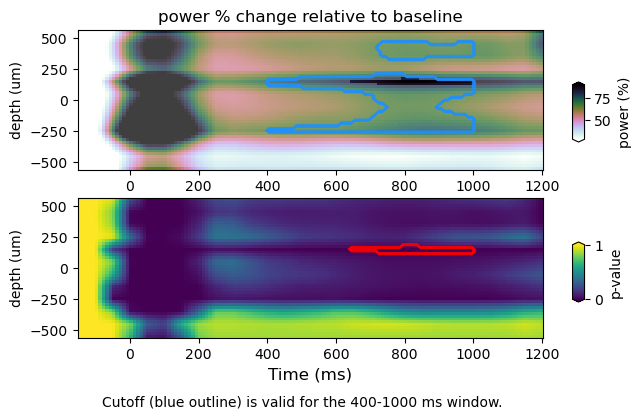

In [6]:
type         = 'whole'
null         = [95, 0.05] # percentile, p-value
fband        = 0
cond         = 0

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 
 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_100.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (30, 12, 16, 113)
whole-null
cutoff computed using whole null distribution:  70.79162686024465
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_high_grat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_grat_spw_100.npz
tfr emp  :  (30, 12, 16, 113)
tfr null    (30, 12, 16, 113)
peak frequency range :  28.0 44.0
power average within peak: 86.6390137791448
whole-null
cutoff computed using whole null distribution:  70.52901730660238
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_high_grat_spw.png


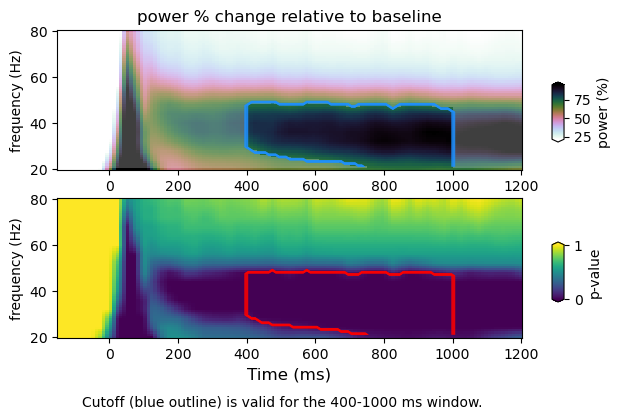

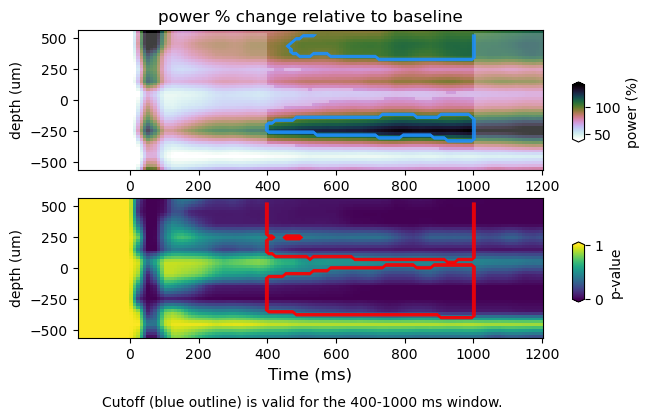

In [7]:
type         = 'whole'
null         = [95, 0.05] # percentile, p-value
fband        = 1
cond         = 0

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 
 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_grat_spw_100.npz
tfr emp  :  (30, 12, 11, 141)
tfr null    (30, 12, 11, 141)
whole-null
cutoff computed using whole null distribution:  18.600732576584463
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_higher_grat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_grat_spw_100.npz
tfr emp  :  (30, 12, 11, 141)
tfr null    (30, 12, 11, 141)
peak frequency range :  128.0
power average within peak: 17.280991024867717
whole-null
cutoff computed using whole null distribution:  21.51622541435592
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_higher_grat_spw.png


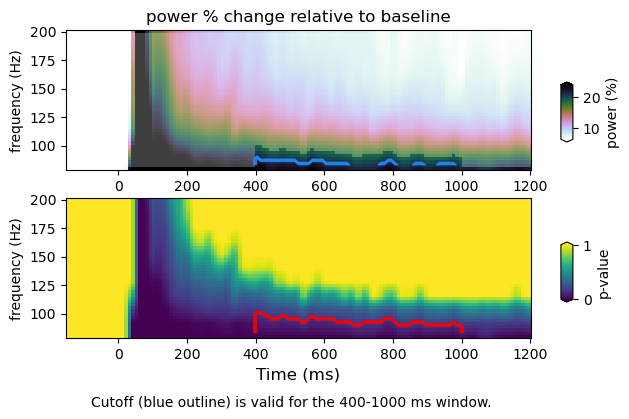

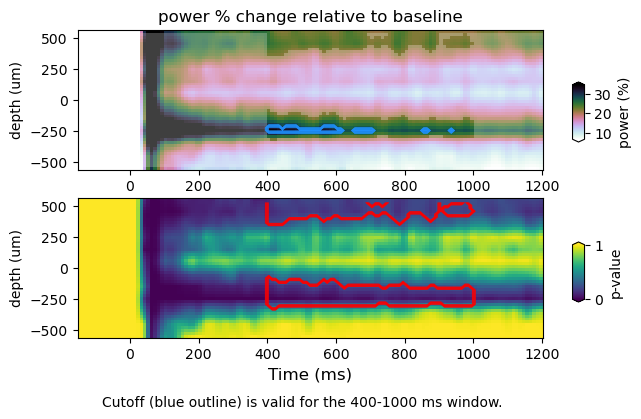

In [8]:
type         = 'whole'
null         = [95, 0.05] # percentile, p-value
fband        = 2
cond         = 0

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 
 

## Conclusion

Plotting the p-values of the whole time-frequency map, we can see that level of detail is not enough to see the differences between the "min-max and the "whole-null" approach. However, the time-frequency-space maps show that there are differences between the two approaches, specially in the spatial distribution of p-values. While pooling the null data for further multiple comparisons corrections, the "whole-null" approach accounts for specific dimensions by averaging. As a consequence, the "whole-null" approach captures spatial detail that is absent in the landcape p-values obtained using the "min-max" approach. The explanation is simple: taking just the minimum and maximum values from the null distribution (when the null data is pooled at each iteration during the permutation procedure) gives rise to a null distribution that is biased by spatial locations that experience more variation. Whereas the "whole-null" approach takes the spatial variation into account, the "min-max" appproach does it just partially. As a result, the time-frequency map seems largely equivalent when using either the "min-max" or "whole-null" approach, whereas the time-frequency-space maps difer, with the "min-max" appproach providing a truncated p-value map. Of course, one may choose a different way to pool the minimum and maximum values, in turn changing the resulting landscape of p-values, as well as the hypothesis (!). This simple example shows that there is no size fits all when it comes to complex scrutiny (...it seems).... corroborating Daniël Lackens [post](https://twitter.com/lakens/status/1718654122516156777).  

## And for the naturalistic images..

*  Results saving minimal and maximal values at each permutation iteration (Min-Max approach)

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_nat_spw_100_minmax.npz
tfr emp  :  (36, 12, 19, 57)
tfr null    (100, 36, 12, 19, 2)
min-max
cutoff computed using min/max of null distribution:  69.10555216338108
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_low_nat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_nat_spw_100_minmax.npz
tfr emp  :  (36, 12, 19, 57)
tfr null    (100, 36, 12, 19, 2)
peak frequency range :  7.0 11.0
power average within peak: 48.72408550213469
min-max
cutoff computed using min/max of null distribution:  68.30246572386639
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_low_nat_spw.png


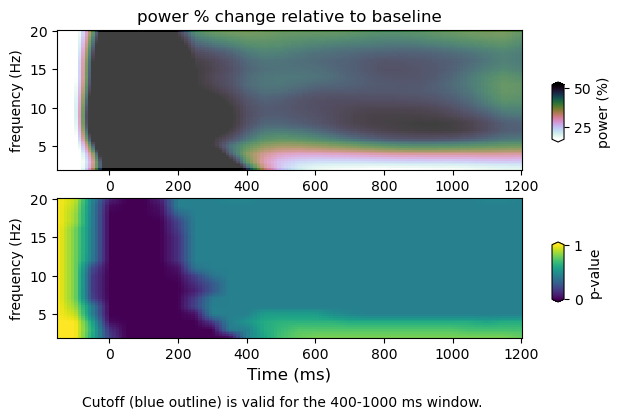

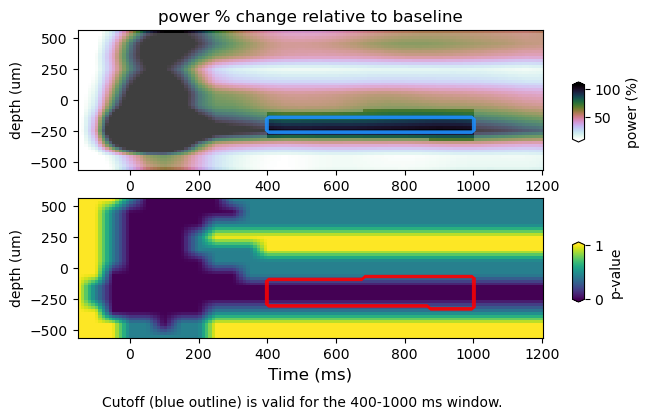

In [9]:
type         = 'minmax'
null         = [95, 0.05] # percentile, p-value
fband        = 0
cond         = 1

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_nat_spw_100_minmax.npz
tfr emp  :  (36, 12, 16, 113)
tfr null    (100, 36, 12, 16, 2)
min-max
cutoff computed using min/max of null distribution:  62.03888557269407
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_high_nat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_nat_spw_100_minmax.npz
tfr emp  :  (36, 12, 16, 113)
tfr null    (100, 36, 12, 16, 2)
peak frequency range :  40.0 56.0
power average within peak: 42.30210196950297
min-max
cutoff computed using min/max of null distribution:  61.622483074062046
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_high_nat_spw.png


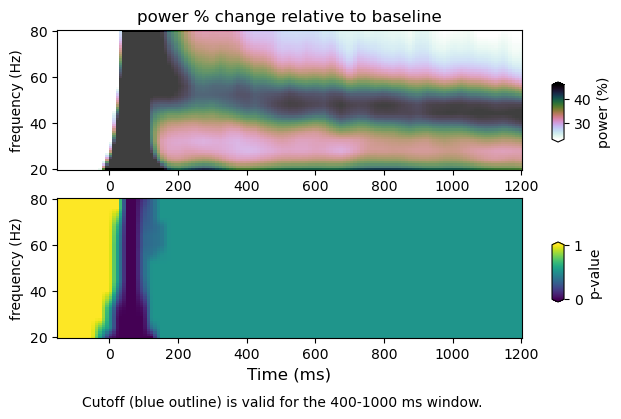

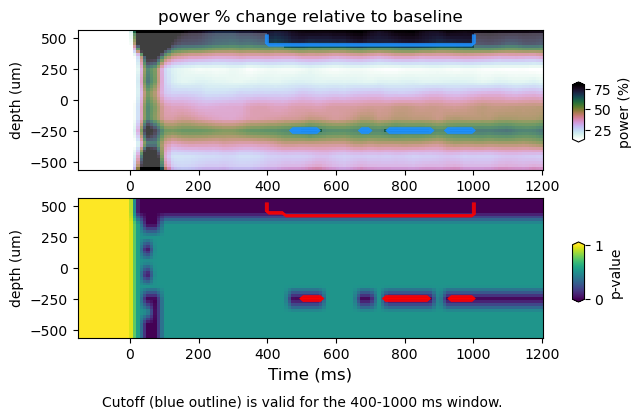

In [10]:
type         = 'minmax'
null         = [95, 0.05] # percentile, p-value
fband        = 1
cond         = 1

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_nat_spw_100_minmax.npz
tfr emp  :  (36, 12, 11, 141)
tfr null    (100, 36, 12, 11, 2)
min-max
cutoff computed using min/max of null distribution:  52.84000080414981
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_higher_nat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_nat_spw_100_minmax.npz
tfr emp  :  (36, 12, 11, 141)
tfr null    (100, 36, 12, 11, 2)
peak frequency range :  128.0
power average within peak: 22.725663180435006
min-max
cutoff computed using min/max of null distribution:  56.15675676398402
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_higher_nat_spw.png


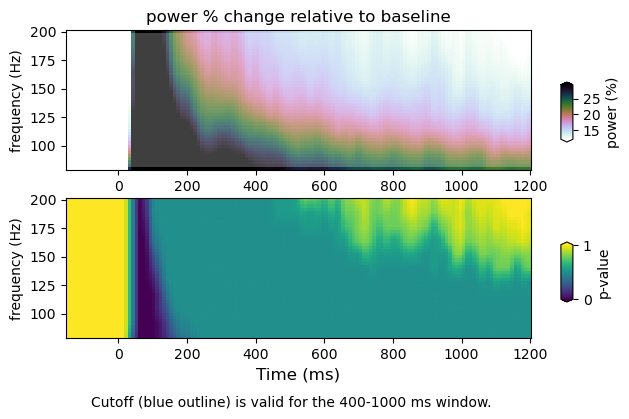

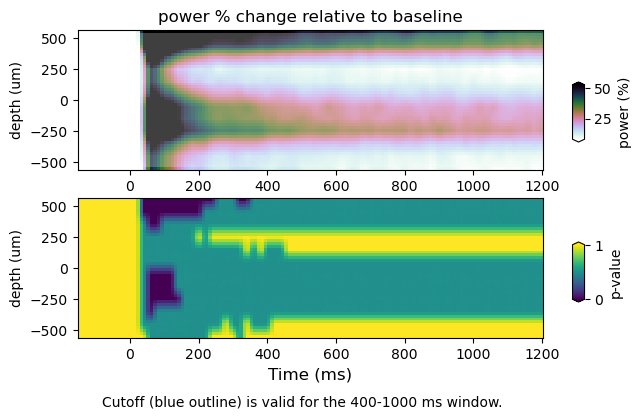

In [11]:
type         = 'minmax'
null         = [95, 0.05] # percentile, p-value
fband        = 2 
cond         = 1

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 

* Results using the whole null distribution averaged across relevant dimensions

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_nat_spw_100.npz
tfr emp  :  (36, 12, 19, 57)
tfr null    (36, 12, 19, 57)
whole-null
cutoff computed using whole null distribution:  62.383432314586074
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_low_nat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_low_nat_spw_100.npz
tfr emp  :  (36, 12, 19, 57)
tfr null    (36, 12, 19, 57)
peak frequency range :  7.0 11.0
power average within peak: 48.72408550213469
whole-null
cutoff computed using whole null distribution:  55.43066440983921
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_low_nat_spw.png


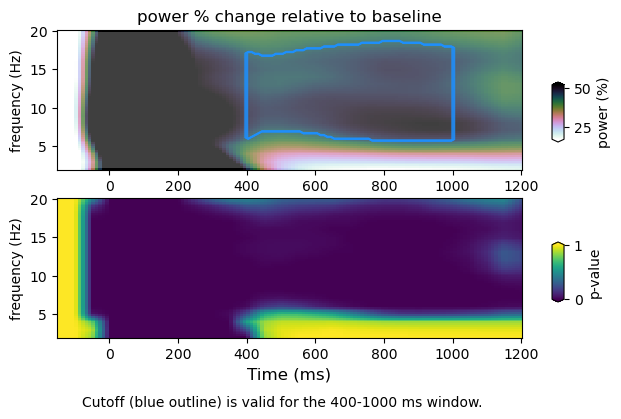

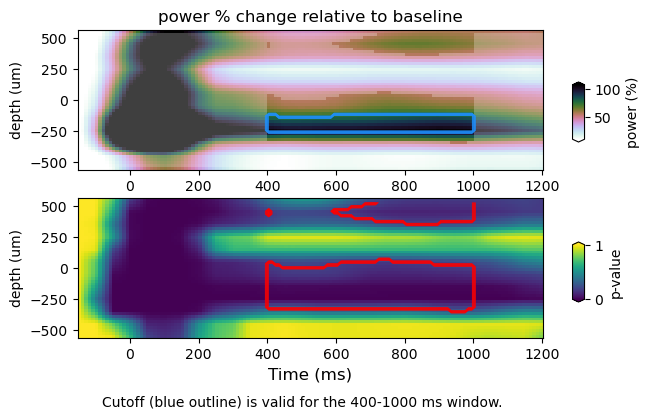

In [12]:
type         = 'whole'
null         = [95, 0.05] # percentile, p-value
fband        = 0
cond         = 1

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 
 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_nat_spw_100.npz
tfr emp  :  (36, 12, 16, 113)
tfr null    (36, 12, 16, 113)
whole-null
cutoff computed using whole null distribution:  57.22165826879343
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_high_nat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_high_nat_spw_100.npz
tfr emp  :  (36, 12, 16, 113)
tfr null    (36, 12, 16, 113)
peak frequency range :  40.0 56.0
power average within peak: 42.30210196950297
whole-null
cutoff computed using whole null distribution:  37.013889474269604
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_high_nat_spw.png


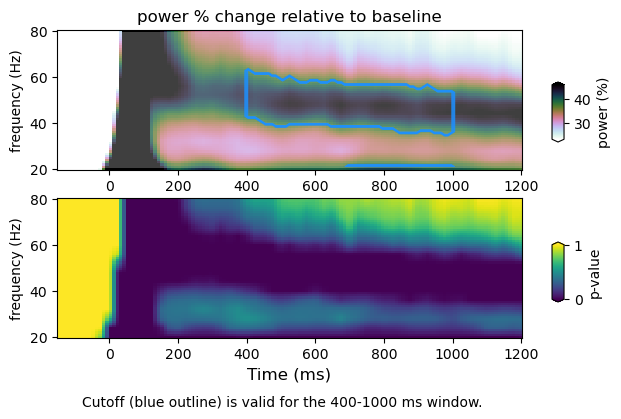

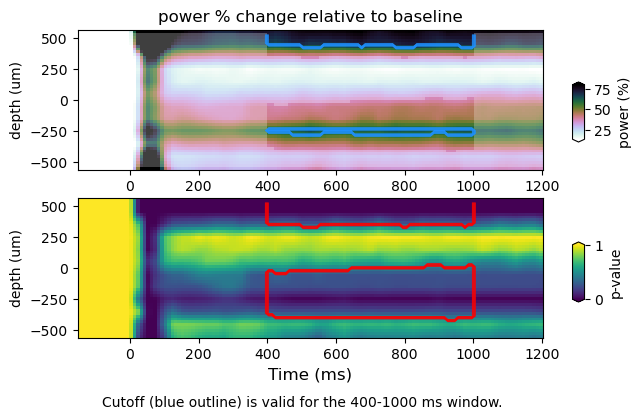

In [13]:
type         = 'whole'
null         = [95, 0.05] # percentile, p-value
fband        = 1
cond         = 1

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 
 

stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_nat_spw_100.npz
tfr emp  :  (36, 12, 11, 141)
tfr null    (36, 12, 11, 141)
whole-null
cutoff computed using whole null distribution:  35.58854114351175
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_gtfr_higher_nat_spw.png
stats : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_stats_higher_nat_spw_100.npz
tfr emp  :  (36, 12, 11, 141)
tfr null    (36, 12, 11, 141)
peak frequency range :  128.0
power average within peak: 22.725663180435006
whole-null
cutoff computed using whole null distribution:  24.47158173508068
figure : /Volumes/Gandalf/MWlamprop/results/stats/univariate/uvtfr_dtfr_higher_nat_spw.png


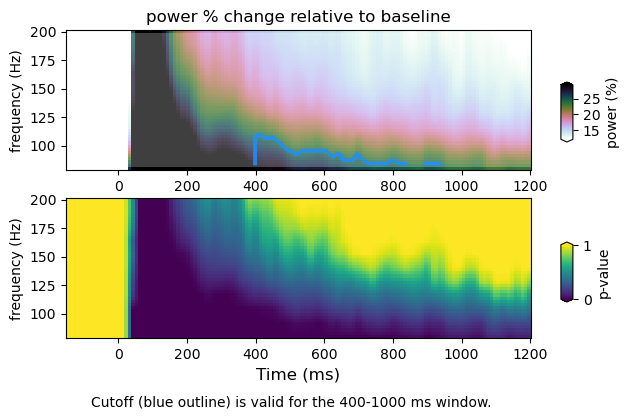

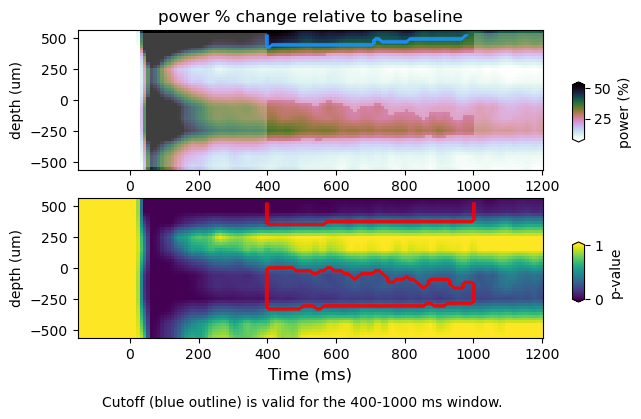

In [14]:
type         = 'whole'
null         = [95, 0.05] # percentile, p-value
fband        = 2
cond         = 1

# Time-frequency map
TFR_emp, significant, THR  = plot_tfr_stats(out_path, cond, fband, null, type)  

# Time-frequency-space map
TFR_emp, significant, THR  = plot_dtfr_stats(out_path, cond, fband, null, type) 
 